In [1]:
import matplotlib.pyplot as plt
from pathlib import Path
import geopandas as gpd
import contextily as ctx
from geodatasets import get_path
import pandas as pd
from shapely.geometry import Point
from adjustText import adjust_text

In [2]:
# --------- Paths ---------
shapefiles_dir=Path("../MSWEP/shapefiles")
streamflow_stations_dir=Path("/inputs/data_updated_2/attributes/attributes_other.csv")

In [3]:
zip_files = sorted(shapefiles_dir.glob("*.zip"))
print(f"Found {len(zip_files)} zipped shapefiles:")
for f in zip_files:
    print(" -", f.name)


Found 17 zipped shapefiles:
 - bequelo.zip
 - durazno.zip
 - fraile_muerto.zip
 - mercedes.zip
 - paso_aguiar.zip
 - paso_baltasar.zip
 - paso_de_la_compania.zip
 - paso_de_las_piedras.zip
 - paso_de_las_piedras_rn.zip
 - paso_de_las_toscas.zip
 - paso_de_los_mellizos.zip
 - paso_del_borracho.zip
 - paso_manuel_diaz.zip
 - paso_mazangano.zip
 - picada_de_coelho.zip
 - sarandi_del_yi.zip
 - tacuarembo.zip


In [4]:
CAMELS_UY_dir={"1":"paso_de_la_compania",
               "2":"paso_de_las_piedras",
               "3":"paso_manuel_diaz",
               "4":"tacuarembo",
               "5":"paso_baltasar",
               "6":"paso_del_borracho",
               "7":"picada_de_coelho",
               "8":"paso_de_las_toscas",
               "9":"paso_aguiar",
               "10":"paso_mazangano",
               "11":"fraile_muerto",
               "12":"sarandi_del_yi",
               "13":"durazno",
               "14":"paso_de_los_mellizos",
               "15":"paso_de_las_piedras_rn",
               "16":"bequelo"}

In [5]:
# # Get a simple world land shapefile
# world_path = get_path("naturalearth.land")  # small polygons for land
# world = gpd.read_file(world_path).to_crs(epsg=4326)  # make sure it's in lat/lon

# ---- Load Natural Earth detailed countries (10m resolution) ----
url_countries_10m = "https://naciscdn.org/naturalearth/10m/cultural/ne_10m_admin_0_countries.zip"
countries = gpd.read_file(url_countries_10m).to_crs(epsg=4326)

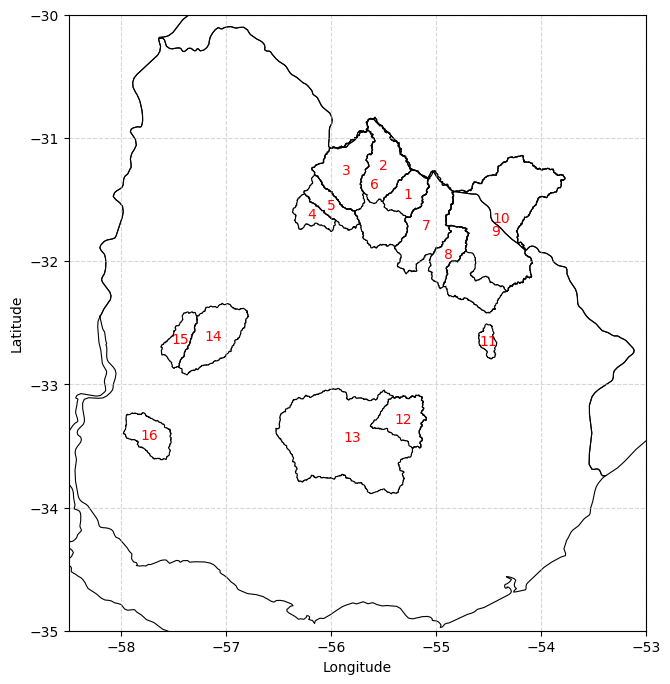

In [6]:
fig, ax = plt.subplots(figsize=(8,8))

# Plot country borders
countries.plot(ax=ax, facecolor="none", edgecolor="black", linewidth=0.8)

# Plot each basin
for z in zip_files:
    if z.stem.lower() == "mercedes":
        continue
    gdf = gpd.read_file(f"zip://{z}")
    gdf.plot(ax=ax, edgecolor="k", facecolor="none", linewidth=0.8)

    # Find the number from the dictionary
    basin_number = None
    for num, name in CAMELS_UY_dir.items():
        if name.lower() == z.stem.lower():
            basin_number = num
            break
    
    # Add label at centroid(s)
    if basin_number is not None:
        # Some shapefiles may have multiple polygons
        for geom in gdf.geometry:
            x, y = geom.centroid.x, geom.centroid.y
            ax.text(x, y, basin_number, fontsize=10, color='red',
                    ha='center', va='center')

# ax.set_title("Basin Shapefiles")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.grid(True, linestyle="--", alpha=0.5)

# ---- Limit map to Uruguay approximate bounds ----
# Uruguay approx: lon -58.5 to -53, lat -35 to -30
ax.set_xlim(-58.5, -53)
ax.set_ylim(-35, -30)

plt.show()

## Map with precip and streamflow stations

In [7]:
attributes=pd.read_csv(streamflow_stations_dir)
attributes = attributes[attributes['gauge_id'].str.startswith('CAMELS_UY_')]
attributes.head()

,gauge_id,gauge_name,country,gauge_lat,gauge_lon,area
15960,CAMELS_UY_1,Paso de la Compania,Uruguay,-31.577506,-55.465611,1044.805388
15961,CAMELS_UY_2,Paso de las Piedras,Uruguay,-31.530457,-55.584818,1923.084030
15962,CAMELS_UY_3,Paso Manuel Diaz,Uruguay,-31.529667,-55.686583,2212.331158
15963,CAMELS_UY_4,Tacuarembo,Uruguay,-31.529667,-55.686583,673.286140
15964,CAMELS_UY_5,Paso Baltasar,Uruguay,-31.728558,-55.769773,917.609589


In [8]:
# Create geometry column from lat/lon
geometry = [Point(xy) for xy in zip(attributes['gauge_lon'], attributes['gauge_lat'])]

# Convert to GeoDataFrame
stations_gdf = gpd.GeoDataFrame(attributes, geometry=geometry)

In [9]:
stations_gdf

,gauge_id,gauge_name,country,gauge_lat,gauge_lon,area,geometry
15960,CAMELS_UY_1,Paso de la Compania,Uruguay,-31.577506,-55.465611,1044.805388,POINT (-55.46561 -31.57751)
15961,CAMELS_UY_2,Paso de las Piedras,Uruguay,-31.530457,-55.584818,1923.084030,POINT (-55.58482 -31.53046)
15962,CAMELS_UY_3,Paso Manuel Diaz,Uruguay,-31.529667,-55.686583,2212.331158,POINT (-55.68658 -31.52967)
15963,CAMELS_UY_4,Tacuarembo,Uruguay,-31.529667,-55.686583,673.286140,POINT (-55.68658 -31.52967)
15964,CAMELS_UY_5,Paso Baltasar,Uruguay,-31.728558,-55.769773,917.609589,POINT (-55.76977 -31.72856)
15965,CAMELS_UY_6,Paso del Borracho,Uruguay,-31.876083,-55.471139,6601.754962,POINT (-55.47114 -31.87608)
15966,CAMELS_UY_7,Paso de Coelho,Uruguay,-32.033324,-55.367013,2419.341041,POINT (-55.36701 -32.03332)
15967,CAMELS_UY_8,Paso de las Toscas,Uruguay,-32.158194,-55.023917,970.932984,POINT (-55.02392 -32.15819)
15968,CAMELS_UY_9,Paso Aguiar,Uruguay,-32.286250,-54.831056,8044.566285,POINT (-54.83106 -32.28625)
15969,CAMELS_UY_10,Paso Mazangano,Uruguay,-32.110028,-54.667500,6530.808541,POINT (-54.6675 -32.11003)


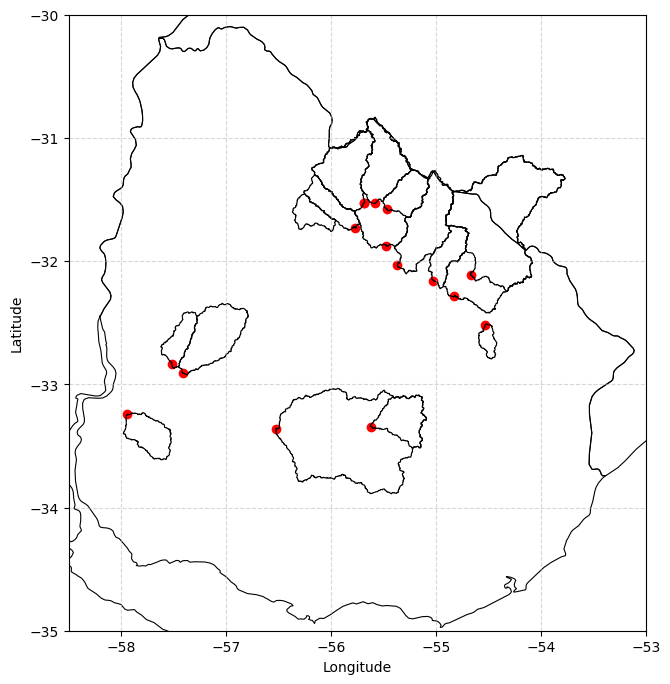

In [10]:
fig, ax = plt.subplots(figsize=(8,8))

# Plot country borders
countries.plot(ax=ax, facecolor="none", edgecolor="black", linewidth=0.8)

# Plot gauges
stations_gdf.plot(ax=ax, marker='o', color='red') #, markersize=50)

# Plot each basin
for z in zip_files:
    if z.stem.lower() == "mercedes":
        continue
    gdf = gpd.read_file(f"zip://{z}")
    gdf.plot(ax=ax, edgecolor="k", facecolor="none", linewidth=0.8)

# ax.set_title("Basin Shapefiles")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.grid(True, linestyle="--", alpha=0.5)

# ---- Limit map to Uruguay approximate bounds ----
# Uruguay approx: lon -58.5 to -53, lat -35 to -30
ax.set_xlim(-58.5, -53)
ax.set_ylim(-35, -30)

plt.show()

# Precipitation gauges

In [11]:
precipitation_gauges=pd.read_excel("./COORDENADAS_filtradas.xlsx")
precipitation_gauges.head()

,lat,lon,Estacion,Departamento,Tipo,Adm
0,-33.72,-53.55,18 de Julio,Rocha,Convencional,INUMET
1,-34.36,-54.06,19 de Abril,Rocha,Convencional,INUMET
2,-34.41,-56.39,25 de Agosto,Florida,Convencional,INUMET
3,-31.87,-54.16,Acegua,Cerro Largo,Convencional,INUMET
4,-32.40,-56.18,Achar,Tacuarembó,Convencional,INUMET


In [12]:
# Create geometry column from lat/lon
precip_geometry = [Point(xy) for xy in zip(precipitation_gauges['lon'], precipitation_gauges['lat'])]

# Convert to GeoDataFrame
precip_stations_gdf = gpd.GeoDataFrame(precipitation_gauges, geometry=precip_geometry)

precip_stations_gdf.head()

,lat,lon,Estacion,Departamento,Tipo,Adm,geometry
0,-33.72,-53.55,18 de Julio,Rocha,Convencional,INUMET,POINT (-53.55 -33.72)
1,-34.36,-54.06,19 de Abril,Rocha,Convencional,INUMET,POINT (-54.06 -34.36)
2,-34.41,-56.39,25 de Agosto,Florida,Convencional,INUMET,POINT (-56.39 -34.41)
3,-31.87,-54.16,Acegua,Cerro Largo,Convencional,INUMET,POINT (-54.16 -31.87)
4,-32.40,-56.18,Achar,Tacuarembó,Convencional,INUMET,POINT (-56.18 -32.4)


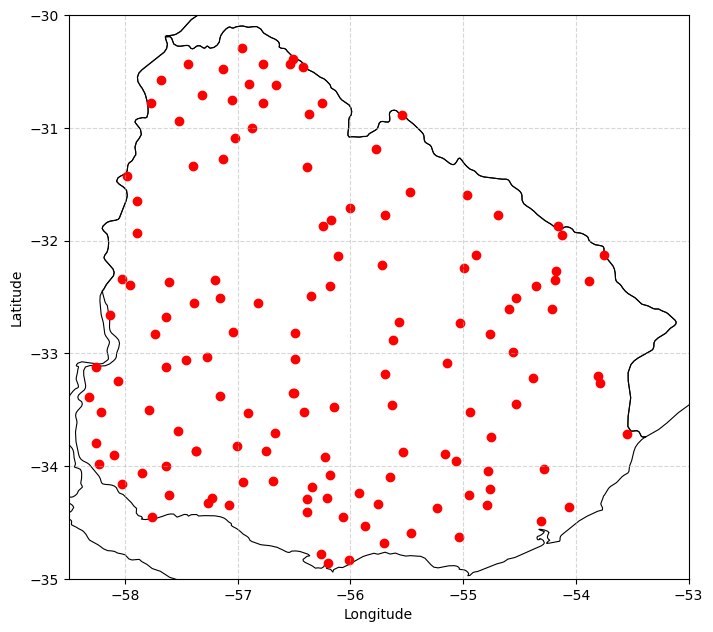

In [13]:
fig, ax = plt.subplots(figsize=(8,8))

# Plot country borders
countries.plot(ax=ax, facecolor="none", edgecolor="black", linewidth=0.8)

# Plot gauges
precip_stations_gdf.plot(ax=ax, marker='o', color='red') #, markersize=50)

# ax.set_title("Basin Shapefiles")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.grid(True, linestyle="--", alpha=0.5)

# ---- Limit map to Uruguay approximate bounds ----
# Uruguay approx: lon -58.5 to -53, lat -35 to -30
ax.set_xlim(-58.5, -53)
ax.set_ylim(-35, -30)

plt.show()